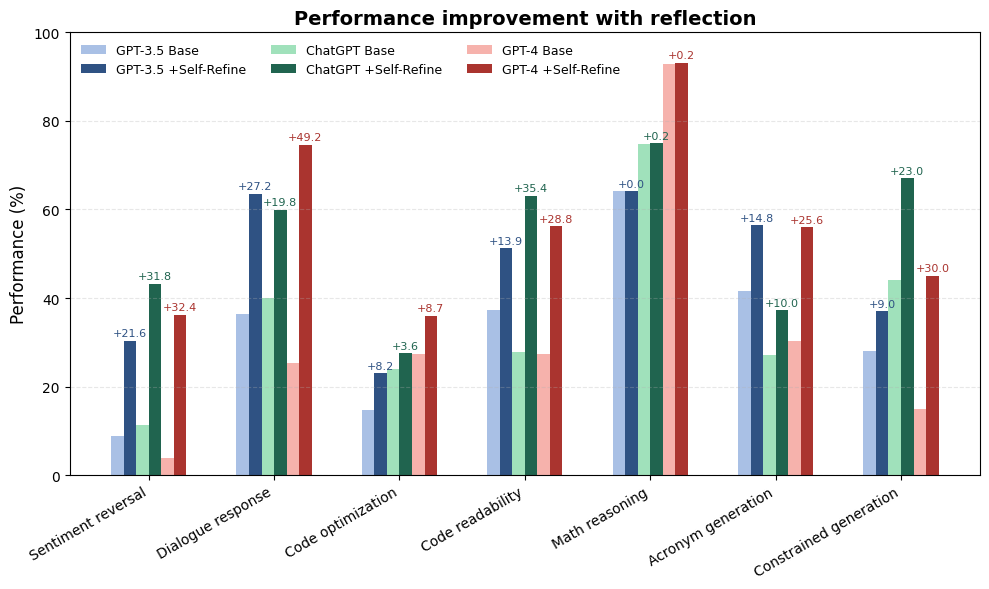

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
tasks = [
    "Sentiment reversal", "Dialogue response", "Code optimization",
    "Code readability", "Math reasoning", "Acronym generation",
    "Constrained generation"
]

# Base and Self-Refine values
gpt35_base = [8.8, 36.4, 14.8, 37.4, 64.1, 41.6, 28.0]
gpt35_refine = [30.4, 63.6, 23.0, 51.3, 64.1, 56.4, 37.0]

chatgpt_base = [11.4, 40.1, 23.9, 27.7, 74.8, 27.2, 44.0]
chatgpt_refine = [43.2, 59.9, 27.5, 63.1, 75.0, 37.2, 67.0]

gpt4_base = [3.8, 25.4, 27.3, 27.4, 92.9, 30.4, 15.0]
gpt4_refine = [36.2, 74.6, 36.0, 56.2, 93.1, 56.0, 45.0]

# Improvements
gpt35_improve = [r - b for r, b in zip(gpt35_refine, gpt35_base)]
chatgpt_improve = [r - b for r, b in zip(chatgpt_refine, chatgpt_base)]
gpt4_improve = [r - b for r, b in zip(gpt4_refine, gpt4_base)]

# Positions and style
x = np.arange(len(tasks))
width = 0.1

plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Color scheme
colors = {
    "gpt35_base": "#a9c0e5",
    "gpt35_refine": "#2f5283",
    "chatgpt_base": "#a0e1bb",
    "chatgpt_refine": "#20644f",
    "gpt4_base": "#f6b2ac",
    "gpt4_refine": "#aa342f",
}

# Bars
plt.bar(x - 2.5*width, gpt35_base, width, color=colors["gpt35_base"], label='GPT-3.5 Base')
plt.bar(x - 1.5*width, gpt35_refine, width, color=colors["gpt35_refine"], label='GPT-3.5 +Self-Refine')

plt.bar(x - 0.5*width, chatgpt_base, width, color=colors["chatgpt_base"], label='ChatGPT Base')
plt.bar(x + 0.5*width, chatgpt_refine, width, color=colors["chatgpt_refine"], label='ChatGPT +Self-Refine')

plt.bar(x + 1.5*width, gpt4_base, width, color=colors["gpt4_base"], label='GPT-4 Base')
plt.bar(x + 2.5*width, gpt4_refine, width, color=colors["gpt4_refine"], label='GPT-4 +Self-Refine')

# Add improvement labels above Self-Refine bars
for i, task in enumerate(tasks):
    plt.text(x[i] - 1.5*width, gpt35_refine[i] + 1, f"+{gpt35_improve[i]:.1f}", ha='center', fontsize=8, color=colors["gpt35_refine"])
    plt.text(x[i] + 0.5*width, chatgpt_refine[i] + 1, f"+{chatgpt_improve[i]:.1f}", ha='center', fontsize=8, color=colors["chatgpt_refine"])
    plt.text(x[i] + 2.5*width, gpt4_refine[i] + 1, f"+{gpt4_improve[i]:.1f}", ha='center', fontsize=8, color=colors["gpt4_refine"])

# Labels and style
plt.ylabel("Performance (%)", fontsize=12)
plt.title("Performance improvement with reflection", fontsize=14, weight='bold')
plt.xticks(x, tasks, rotation=30, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(frameon=False, fontsize=9, ncol=3, loc='upper left')
plt.tight_layout()
plt.savefig('reflection.svg')
